# Data Analysis Capstone Project
# Euclinton Ancheldasio FOLICHE
<center>

## Scenario:
### In the past 5 years, there has been a spike in demand for professionals with skills in IT to provide solutions to numerous business problems, ensuring efficiency of tasks and processes in various industries. The following project aims at exploring the demand rate of IT skills by analysing the number of jobs in industries based on the programming languages and databases skills needed. The data used for this project was collected from the 2019 Stake Overflow Develper Survey, which encompasses job postings from several industry fields posted on GitHub Jobs, ranging from consumer retail, finance & banking to healthcare.  

# Step 1
## Data Collection with APIs

In [1]:
import requests
import pandas as pd

In [2]:
baseurl = "https://jobs.github.com/positions.json"

In [3]:
def get_number_of_jobs(technology):
    number_of_jobs = 0
    #your code goes here
    page=1
    new_results=1
    while new_results>0:
        payload={"description":technology,"page":page}
        r=requests.get(baseurl, params=payload)
        new_results=len(r.json())
        page+=1
        number_of_jobs+=(len(r.json()))
         
    return technology,number_of_jobs

In [4]:
print(get_number_of_jobs('Python'))

('Python', 34)


In [5]:
technology = ['C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']

In [6]:
!pip install openpyxl
from openpyxl import Workbook
import os

In [7]:
wb=Workbook()
ws=wb.active

In [8]:
ws.append(['Technology','Number of Jobs'])
for i in technology:
    pair = get_number_of_jobs(i)
    print(pair[0],pair[1])
    ws.append([pair[0], pair[1]])

C 124
C# 14
C++ 10
Java 50
JavaScript 35
Python 34
Scala 22
Oracle 5
SQL Server 18
MySQL Server 9
PostgreSQL 11
MongoDB 4


In [9]:
wb.save("github-job-postings.xlsx")

In [10]:
git_jobs = pd.read_excel("github-job-postings.xlsx")
git_jobs = git_jobs.sort_values(by='Number of Jobs', ascending=False)
git_jobs

Technology  Number of Jobs
0              C             124
3           Java              50
4     JavaScript              35
5         Python              34
6          Scala              22
8     SQL Server              18
1             C#              14
10    PostgreSQL              11
2            C++              10
9   MySQL Server               9
7         Oracle               5
11       MongoDB               4

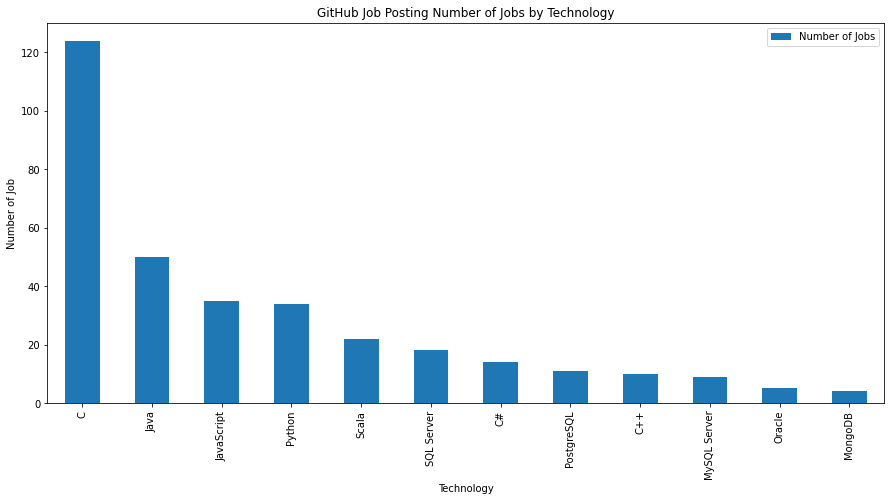

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

git_jobs.plot(kind='bar', x='Technology', y='Number of Jobs', figsize=(15,7))
plt.title('GitHub Job Posting Number of Jobs by Technology')
plt.xlabel('Technology')
plt.ylabel('Number of Job')
plt.show()

# Step 2
## Data Collection with Web Scrapping

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [14]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

In [15]:
data = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")
table = soup.find('table')

In [16]:
table_rows=table.find_all('tr')
x=[]
for tr in table_rows:
    td=tr.find_all('td')
    row=[tr.text for tr in td]
    x.append(row)
print(x)

[['No.', 'Language', 'Created By', 'Average Annual Salary', 'Learning Difficulty'], ['1', 'Python', 'Guido van Rossum', '$114,383', 'Easy'], ['2', 'Java', 'James Gosling', '$101,013', 'Easy'], ['3', 'R', 'Robert Gentleman, Ross Ihaka', '$92,037', 'Hard'], ['4', 'Javascript', 'Netscape', '$110,981', 'Easy'], ['5', 'Swift', 'Apple', '$130,801', 'Easy'], ['6', 'C++', 'Bjarne Stroustrup', '$113,865', 'Hard'], ['7', 'C#', 'Microsoft', '$88,726', 'Hard'], ['8', 'PHP', 'Rasmus Lerdorf', '$84,727', 'Easy'], ['9', 'SQL', 'Donald D. Chamberlin, Raymond F. Boyce.', '$84,793', 'Easy'], ['10', 'Go', 'Robert Griesemer, Ken Thompson, Rob Pike.', '$94,082', 'Difficult']]


In [19]:
df_2=pd.DataFrame(x)
df_2=pd.DataFrame(x, columns=df_2.iloc[0])
df_2.drop(df_2.index[0], inplace=True)
df_2

0  No.    Language                                 Created By  \
1    1      Python                           Guido van Rossum   
2    2        Java                              James Gosling   
3    3           R               Robert Gentleman, Ross Ihaka   
4    4  Javascript                                   Netscape   
5    5       Swift                                      Apple   
6    6         C++                          Bjarne Stroustrup   
7    7          C#                                  Microsoft   
8    8         PHP                             Rasmus Lerdorf   
9    9         SQL    Donald D. Chamberlin, Raymond F. Boyce.   
10  10          Go  Robert Griesemer, Ken Thompson, Rob Pike.   

0  Average Annual Salary Learning Difficulty  
1               $114,383                Easy  
2               $101,013                Easy  
3                $92,037                Hard  
4               $110,981                Easy  
5               $130,801                Easy  
6               $113,865                Hard  
7                $88,726                Hard  
8                $84,727                Easy  
9                $84,793                Easy  
10               $94,082           Difficult

In [25]:
df_2.to_csv('popular-languages.csv')

# Step 3
## Exploratory Data Analysis

In [26]:
import pandas as pd

In [27]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

In [28]:
df_3=pd.read_csv(dataset_url)
df_3.head(5)

Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3  The quality of OSS and closed source software ...  Employed full-time   
4  The quality of OSS and closed source software ...  Employed full-time   

          Country Student                                            EdLevel  \
0   United States      No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1     New Zealand      No  Some college/university study without earning ...   
2   United States      No        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
3  United Kingdom      No        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
4       Australia      No           Bachelor’s degree (BA, BS, B.Eng., etc.)   

                                      UndergradMajor  ...  \
0  Computer science, computer engineering, or sof...  ...   
1  Computer science, computer engineering, or sof...  ...   
2  Computer science, computer engineering, or sof...  ...   
3                                                NaN  ...   
4  Computer science, computer engineering, or sof...  ...   

                              WelcomeChange  \
0   Just as welcome now as I felt last year   
1   Just as welcome now as I felt last year   
2  Somewhat more welcome now than last year   
3   Just as welcome now as I felt last year   
4   Just as welcome now as I felt last year   

                                        SONewContent   Age Gender Trans  \
0  Tech articles written by other developers;Indu...  22.0    Man    No   
1                                                NaN  23.0    Man    No   
2  Tech articles written by other developers;Cour...  28.0    Man    No   
3  Tech articles written by other developers;Indu...  26.0    Man    No   
4  Tech articles written by other developers;Indu...  29.0    Man    No   

                 Sexuality                              Ethnicity Dependents  \
0  Straight / Heterosexual           White or of European descent         No   
1                 Bisexual           White or of European descent         No   
2  Straight / Heterosexual           White or of European descent        Yes   
3  Straight / Heterosexual           White or of European descent         No   
4  Straight / Heterosexual  Hispanic or Latino/Latina;Multiracial         No   

            SurveyLength                  SurveyEase  
0  Appropriate in length                        Easy  
1  Appropriate in length  Neither easy nor difficult  
2  Appropriate in length                        Easy  
3  Appropriate in length  Neither easy nor difficult  
4  Appropriate in length                        Easy  

[5 rows x 85 columns]

In [29]:
df_3.shape

(11552, 85)

In [30]:
df_3.columns.size

85

In [31]:
df_3.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [32]:
df_3['Age'].mean()

30.77239449133718

In [33]:
df_3['Country'].nunique()

135

# Step 4
# Data Wrangling

### Finding & Removing Duplicates, Finding and Imputing Missing Values, Data Normalisation

In [34]:
import pandas as pd

In [35]:
df_4 = pd.read_csv(dataset_url)

In [36]:
# Finding duplicates
df_4.duplicated(subset='Respondent', keep='first').value_counts()

False    11398
True       154
dtype: int64

In [37]:
# Removing duplicates
df_4.drop_duplicates(subset='Respondent', keep='first', inplace=True)

In [38]:
# Verifying duplicate removal
df_4.duplicated(subset='Respondent', keep='first').value_counts()

False    11398
dtype: int64

In [40]:
# Finding missing values
df_4.isna().count()

Respondent      11398
MainBranch      11398
Hobbyist        11398
OpenSourcer     11398
OpenSource      11398
                ...  
Sexuality       11398
Ethnicity       11398
Dependents      11398
SurveyLength    11398
SurveyEase      11398
Length: 85, dtype: int64

In [41]:
df_4['WorkLoc'].isna().sum()

32

In [42]:
df_4['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

In [43]:
# Identifying the most frequent value
df_4['WorkLoc'].value_counts().idxmax()

'Office'

In [44]:
# Imputing missing values
import numpy as np
majority=df_4['WorkLoc'].value_counts().idxmax()
df_4['WorkLoc'].fillna(value=majority,inplace=True)

In [45]:
# Verify missing value input
df_4['WorkLoc'].isna().sum()

0

In [46]:
# Data normalisation
df_4['CompFreq'].value_counts() # ==> Count of the values per category in 'CompFreq'

Yearly     6073
Monthly    4788
Weekly      331
Name: CompFreq, dtype: int64

In [47]:
df_4['CompFreq'].unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

In [49]:
# Normalising data
comp_freq=df_4['CompFreq'].value_counts().idxmax()
df_4['CompFreq'].replace(r'^\s*$', np.nan, inplace=True)
df_4['CompFreq'].replace(np.nan, comp_freq, inplace=True)
#print(df_4.CompFreq.unique())

comp_total = df_4['CompTotal'].median()
df_4['CompTotal'].replace(r'^\s*$', np.nan, inplace = True)
df_4['CompTotal'].replace(np.nan, comp_total, inplace = True)
print(df_4['CompTotal'].isnull().sum()) #prints 0

# normalisation function
df_4['NormalizedAnnualCompenstation'] = np.nan
annual = []
def comp_norm():
    for x,y in zip(df_4['CompFreq'],df_4['CompTotal']):
        if x == 'Monthly':
            annual.append(y*12)
        elif x == 'Weekly':
            annual.append(y*54)
        elif x == 'Yearly':
            annual.append(y)
comp_norm()
df_4['NormalizedAnnualCompensation'] = annual
print(df_4['NormalizedAnnualCompensation'].median())

0
103000.0


In [50]:
df_4['CompTotal'].value_counts().unique().sum()

6089

In [51]:
df_4['Employment'].value_counts().idxmin()

'Employed part-time'

In [52]:
df_4['UndergradMajor'].value_counts().idxmin()

'A health science (ex. nursing, pharmacy, radiology)'

# Step 5
# Data Visualisation

### Plot Distribution Curves, Finding Outliers, Finding Correlation

In [53]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df_5 = pd.read_csv(dataset_url)

C:\Users\eafol\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

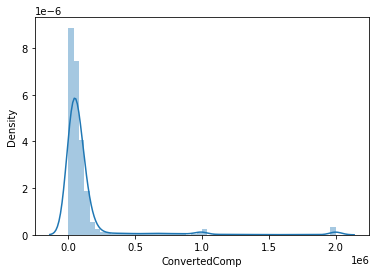

In [55]:
df_5['ConvertedComp'].dropna(inplace=True)
sns.distplot(df_5['ConvertedComp'])

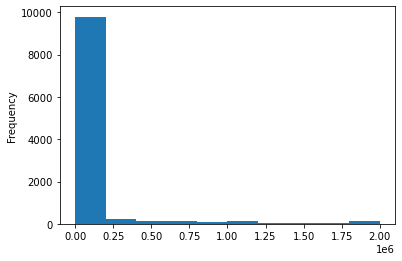

In [56]:
df_5['ConvertedComp'].plot(kind='hist')
plt.show()

In [57]:
df_5['ConvertedComp'].median() #===> before removing duplicates Median=57745

57744.0

In [59]:
df_5.loc[df_5['Gender']=='Man', ['ConvertedComp']].median() #===> median salary for man

ConvertedComp    57744.0
dtype: float64

In [60]:
df_5.loc[df_5['Gender']=='Woman', ['ConvertedComp']].median() #===> median salary for woman

ConvertedComp    57636.0
dtype: float64

In [61]:
df_5['Age'].describe()

count    11255.000000
mean        30.772394
std          7.392780
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

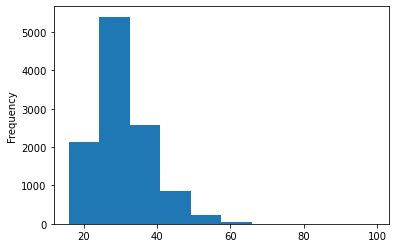

In [62]:
df_5['Age'].plot(kind='hist')

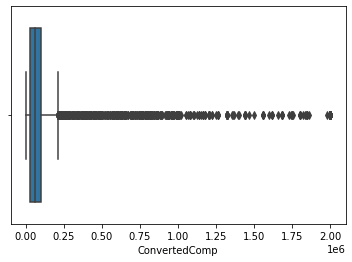

In [63]:
# Finding outliers
ax_0=sns.boxplot(x=df_5['ConvertedComp'])

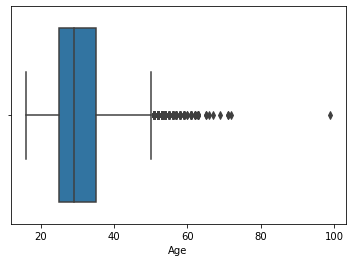

In [64]:
#Finding outlier on df column 'Age'
ax_1=sns.boxplot(x=df_5['Age'], orient='h')

In [65]:
# Finding the inter Quartile Range (IQR)
q1=df_5['ConvertedComp'].quantile(.25)
q2=df_5['ConvertedComp'].quantile(.50)
q3=df_5['ConvertedComp'].quantile(.75)
iqr=q3-q1
print('Quantile 1 is:', q1)
print('Quantile 2 is:', q2)
print('Quantile 3 is:', q3)
print('IQR is:', iqr)

Quantile 1 is: 26727.0
Quantile 2 is: 57744.0
Quantile 3 is: 100000.0
IQR is: 73273.0


In [66]:
# Finding the lower and upper bands
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

print('lower_bound is:', lower_bound)
print('upper_bound is:', upper_bound)

lower_bound is: -83182.5
upper_bound is: 209909.5


In [67]:
# Count the number of outliers
outliers = ((df_5['ConvertedComp']<(lower_bound)) | (df_5['ConvertedComp']>(upper_bound))).sum()
outliers

888

In [68]:
df_5_1=df_5['ConvertedComp'].clip(lower_bound, upper_bound)

print('Converted Compesation Median Value is :', df_5_1.median())
print('Converted Compesation Mean Value is :', df_5_1.mean())

Converted Compesation Median Value is : 57744.0
Converted Compesation Mean Value is : 72295.00093196645


In [69]:
# Correlation
df_5.corr()

Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.012384       0.003173    -0.014384    0.009764   
CompTotal       -0.012384   1.000000       0.001003     0.003533    0.007320   
ConvertedComp    0.003173   0.001003       1.000000     0.020885   -0.034383   
WorkWeekHrs     -0.014384   0.003533       0.020885     1.000000    0.026910   
CodeRevHrs       0.009764   0.007320      -0.034383     0.026910    1.000000   
Age              0.005103   0.007036       0.103652     0.036887   -0.018505   

                    Age  
Respondent     0.005103  
CompTotal      0.007036  
ConvertedComp  0.103652  
WorkWeekHrs    0.036887  
CodeRevHrs    -0.018505  
Age            1.000000

# Step 6
# Advanced Data Visualisation with SQL queries ==>  Cloud Database

In [75]:
# wget ===> If *wget* is not working ==> downdoad the .exe from https://eternallybored.org/misc/wget/, copy and then past into drive C:\\Windowns\Systems32 for windowns user
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite


 22750K .......... .......... .......... .......... .......... 63% 2.61M 3s
 22800K .......... .......... .......... .......... .......... 63% 2.04M 3s
 22850K .......... .......... .......... .......... .......... 63% 2.18M 3s
 22900K .......... .......... .......... .......... .......... 64% 1.68M 3s
 22950K .......... .......... .......... .......... .......... 64% 4.14M 3s
 23000K .......... .......... .......... .......... .......... 64% 2.39M 3s
 23050K .......... .......... .......... .......... .......... 64% 2.41M 3s
 23100K .......... .......... .......... .......... .......... 64% 2.20M 3s
 23150K .......... .......... .......... .......... .......... 64% 2.25M 3s
 23200K .......... .......... .......... .......... .......... 64% 2.30M 3s
 23250K .......... .......... .......... .......... .......... 65% 1.56M 3s
 23300K .......... .......... .......... .......... .......... 65% 3.74M 3s
 23350K .......... .......... .......... .......... .......... 65% 4.49M 3s
 23400K ...

In [76]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

## Database Manipulation with SQLite
### Query Structure 

In [77]:
# SQL querying format
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df_6 = pd.read_sql_query(QUERY,conn)
df_6.head()

COUNT(*)
0     11398

## Table List

In [78]:
# List of tables
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

Table_Name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master

### Group Query

In [79]:
# Group query
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

Age  count
0    NaN    287
1   16.0      3
2   17.0      6
3   18.0     29
4   19.0     78
5   20.0    109
6   21.0    203
7   22.0    406
8   23.0    581
9   24.0    679
10  25.0    738
11  26.0    720
12  27.0    724
13  28.0    787
14  29.0    697
15  30.0    651
16  31.0    531
17  32.0    489
18  33.0    483
19  34.0    395
20  35.0    393
21  36.0    308
22  37.0    280
23  38.0    279
24  39.0    232
25  40.0    187
26  41.0    136
27  42.0    162
28  43.0    100
29  44.0     95
30  45.0     85
31  46.0     66
32  47.0     68
33  48.0     64
34  49.0     66
35  50.0     57
36  51.0     29
37  52.0     41
38  53.0     32
39  54.0     26
40  55.0     13
41  56.0     16
42  57.0     11
43  58.0     12
44  59.0     11
45  60.0      2
46  61.0     10
47  62.0      5
48  63.0      7
49  65.0      2
50  66.0      1
51  67.0      1
52  69.0      1
53  71.0      2
54  72.0      1
55  99.0      1

### Table Description

In [80]:
# Table description
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name = '{}'
""".format(table_name)

df_6_0 = pd.read_sql_query(QUERY,conn)
print(df_6_0.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Hands-on work
### Visualising data

array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

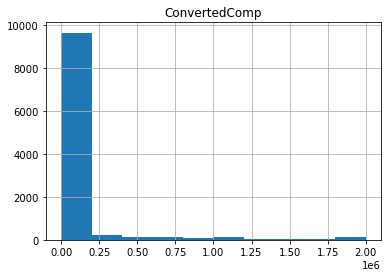

In [81]:
# Histogram
QUERY = """ 
SELECT * FROM Master
"""
df_6_1=pd.read_sql_query(QUERY,conn)
df_6_1.hist(column='ConvertedComp')

<AxesSubplot:>

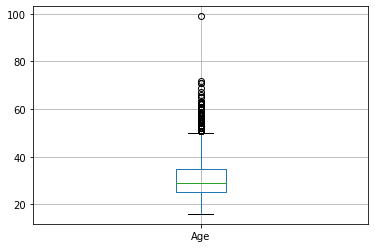

In [82]:
# Box plot
QUERY = """ 
SELECT * FROM Master
"""
df_6_2=pd.read_sql_query(QUERY,conn)
df_6_2.boxplot(column='Age')

<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

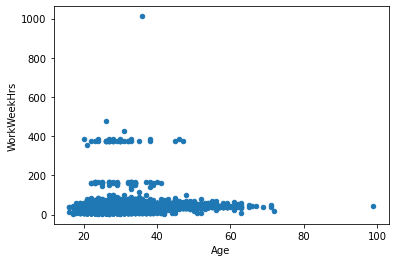

In [83]:
# Scatter plot
QUERY = """ 
SELECT Age, WorkWeekHrs FROM Master
"""
df_6_3=pd.read_sql_query(QUERY,conn)
df_6_3.plot(kind='scatter', x='Age', y='WorkWeekHrs')

Text(0, 0.5, 'CodeRevHrs')

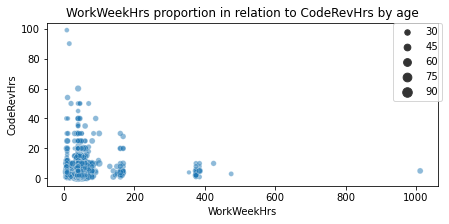

In [84]:
# Bubble plot
QUERY = """ 
SELECT WorkWeekHrs, CodeRevHrs, Age FROM Master
"""
df_6_4=pd.read_sql_query(QUERY,conn)

df_6_4.dropna(subset=['CodeRevHrs'], inplace=True)

plt.figure(figsize=(7,3))
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', sizes=(15,100), alpha=0.5, data=df_6_4)

plt.title('WorkWeekHrs proportion in relation to CodeRevHrs by age')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')

In [85]:
# Pie charts
QUERY = """
SELECT * FROM LanguageDesireNextYear 
"""
df_6_5=pd.read_sql_query(QUERY,conn)
df_6_5_1=df_6_5.groupby(by=['LanguageDesireNextYear']).count()
df_6_5_1.rank(method='dense', ascending=True, na_option='keep', pct=False, axis=0)

Respondent
LanguageDesireNextYear            
Assembly                       3.0
Bash/Shell/PowerShell         21.0
C                             11.0
C#                            22.0
C++                           17.0
Clojure                        4.0
Dart                           5.0
Elixir                         6.0
Erlang                         2.0
F#                             7.0
Go                            19.0
HTML/CSS                      26.0
Java                          20.0
JavaScript                    27.0
Kotlin                        18.0
Objective-C                    2.0
Other(s):                      8.0
PHP                           15.0
Python                        25.0
R                              9.0
Ruby                          12.0
Rust                          16.0
SQL                           24.0
Scala                         10.0
Swift                         13.0
TypeScript                    23.0
VBA                            1.0
WebAssembly                   14.0

In [86]:
QUERY = """
SELECT * FROM DevType   
"""
df_6_6=pd.read_sql_query(QUERY,conn)
df_6_6_1=df_6_6.groupby(by=['DevType']).count()
df_6_6_1

Respondent
DevType                                                  
Academic researcher                                   556
Data or business analyst                              802
Data scientist or machine learning specialist         803
Database administrator                               1413
Designer                                              988
DevOps specialist                                    1639
Developer, QA or test                                 911
Developer, back-end                                  6290
Developer, desktop or enterprise applications        2575
Developer, embedded applications or devices           854
Developer, front-end                                 3920
Developer, full-stack                                6928
Developer, game or graphics                           472
Developer, mobile                                    1959
Educator                                              514
Engineer, data                                        832
Engineer, site reliability                            449
Engineering manager                                   386
Marketing or sales professional                        61
Product manager                                       480
Scientist                                             354
Senior executive/VP                                   160
Student                                               766
System administrator                                 1202

In [87]:
QUERY = """
SELECT * FROM LanguageWorkedWith  
"""
df_6_7=pd.read_sql_query(QUERY,conn)
df_6_7_1=df_6_7.groupby(by=['LanguageWorkedWith']).count()
df_6_7_1

Respondent
LanguageWorkedWith               
Assembly                      437
Bash/Shell/PowerShell        4642
C                            1578
C#                           4288
C++                          1946
Clojure                       164
Dart                          237
Elixir                        187
Erlang                         98
F#                            158
Go                           1114
HTML/CSS                     7830
Java                         4506
JavaScript                   8687
Kotlin                        751
Objective-C                   518
Other(s):                     840
PHP                          2913
Python                       4542
R                             585
Ruby                         1149
Rust                          324
SQL                          7106
Scala                         492
Swift                         707
TypeScript                   3232
VBA                           628
WebAssembly                   133

No handles with labels found to put in legend.


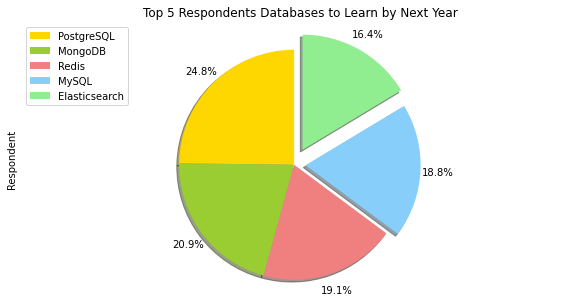

In [88]:
QUERY = """
SELECT * FROM DatabaseDesireNextYear 
"""
df_6_8=pd.read_sql_query(QUERY,conn)

df_6_8_1=df_6_8.groupby(by=['DatabaseDesireNextYear']).count()
df_6_8_2=df_6_8_1.sort_values(by=['Respondent'], ascending=False)
df_db=df_6_8_2.head(5) # limit of the top 5 databases worked with
df_db

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.0, 0, 0, 0.1, 0.15] # ratio for each continent with which to offset each wedge.

df_db.plot(kind='pie', subplots=True, figsize=(10, 5), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.15, colors=colors_list, explode=explode_list)

plt.title('Top 5 Respondents Databases to Learn by Next Year', y=1) 
plt.axis('equal') 
plt.legend(labels=df_db.index, loc='upper left') 

plt.show()

Text(0, 0.5, 'Hours')

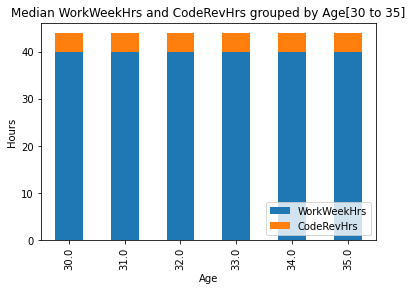

In [89]:
# Stacked chart
QUERY = """ 
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
WHERE Age BETWEEN 30 AND 35 """
df_6_9=pd.read_sql_query(QUERY,conn)

df_wca=df_6_9.groupby('Age').median()

df_wca.plot(kind='bar', stacked=True)
plt.title('Median WorkWeekHrs and CodeRevHrs grouped by Age[30 to 35]')
plt.legend(loc='lower right')
plt.xlabel('Age')
plt.ylabel('Hours')

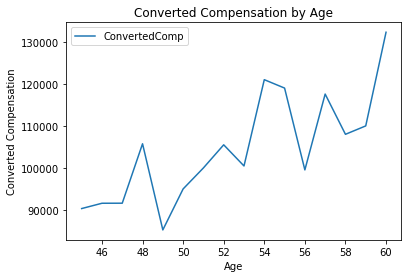

In [90]:
# Line chart
QUERY = """ 
SELECT ConvertedComp, Age FROM master
WHERE Age BETWEEN 45 AND 60 """
df_6_10=pd.read_sql_query(QUERY,conn)

df_6_10_1=df_6_10.dropna(subset=['ConvertedComp'])
df_cca=df_6_10_1.groupby('Age').median()

df_cca.plot(kind='line')
plt.title('Converted Compensation by Age')
plt.xlabel('Age')
plt.ylabel('Converted Compensation')

plt.show()

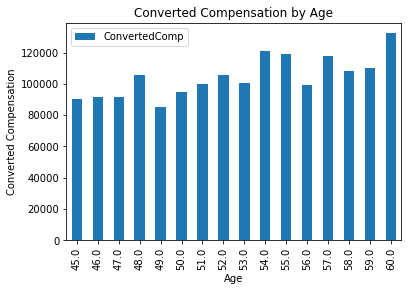

In [91]:
df_cca.plot(kind='bar')
plt.title('Converted Compensation by Age')
plt.xlabel('Age')
plt.ylabel('Converted Compensation')

plt.show()

In [92]:
conn.close()

# Step 7
# Dashboard Built on IBM Watson Studio

### To see dashboard, visit: http://bit.ly/EF_capstone_project_dashboards 